<a href="https://colab.research.google.com/github/sadehqaan/dogs-cats/blob/master/dogs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Dogs and Cats`
=====

In [0]:
#!pip install fastai
#!ls /root/

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
bs=64

In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_75.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_19.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_119.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_103.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_201.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4, p_affine=1., p_lighting=1.)

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=tfms, size=224, bs=bs).normalize(imagenet_stats)

In [0]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=2)

def get_data(size, bs, padding_mode='reflection'):
  return (src.label_from_re(pat).transform(tfms, size=size, padding_mode=padding_mode).databunch(bs=bs).normalize(imagenet_stats))

#data = get_data(224, bs, 'zeros')

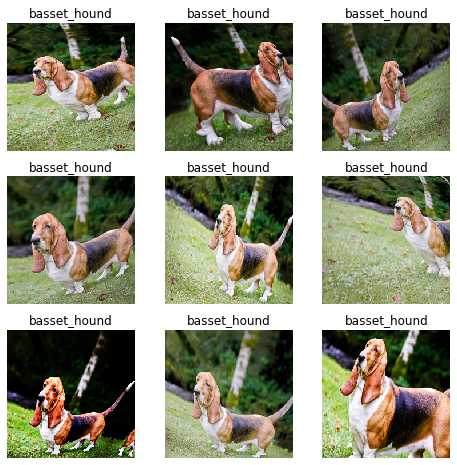

In [13]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

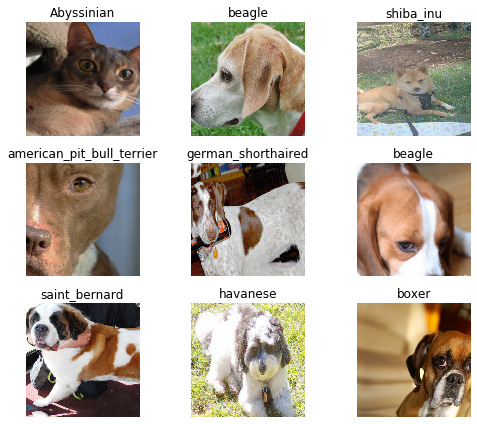

In [16]:
data.show_batch(rows=3, figsize=(7,6))

In [17]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 29.4MB/s]


In [0]:
learn.model

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

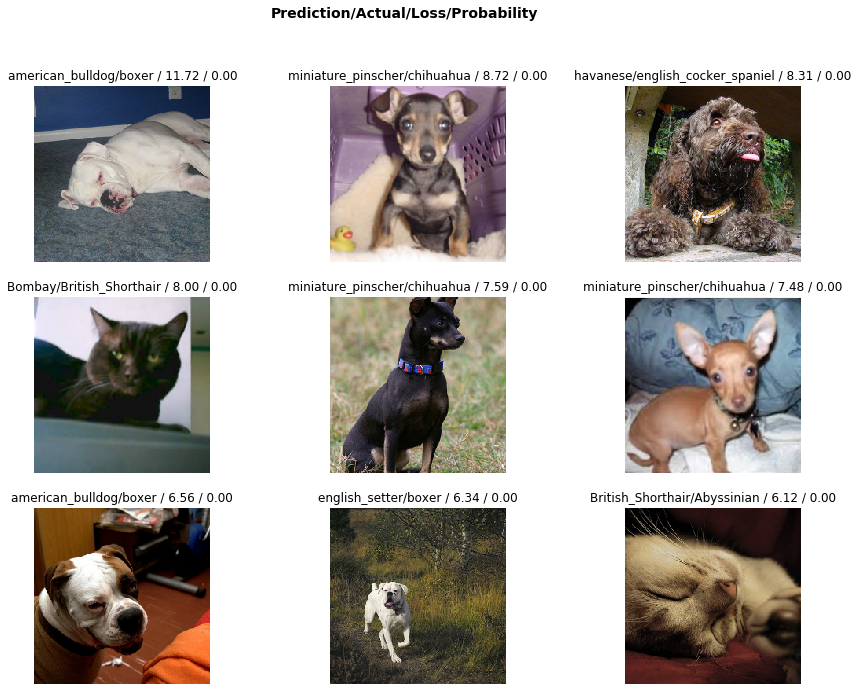

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 10),
 ('chihuahua', 'miniature_pinscher', 6),
 ('keeshond', 'leonberger', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('beagle', 'basset_hound', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Birman', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('boxer', 'american_bulldog', 3),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('american_bulldog', 'pug', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('german_shorthaired', 'american_pit_bull_terrier', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('miniature_pinscher', 'staffordshire_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


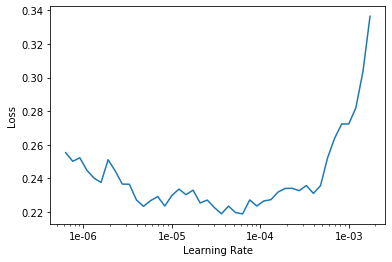

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.235611,0.215551,0.077808,01:42
1,0.217033,0.216606,0.071719,01:42
